# K-Nearest Clustering -Scratch

Soyut Algoritma; 
1. Ağırlık merkezlerini başlatmak - Rastgele K nokta sayısı ile başlanır.
2. Kümeleri Atamak - Kümeler, merkezden uzaklıkları hesaplanarak, minimum mesafeler üzerinden ağırlık merkezine atanarak veri kümesindeki her noktaya atanır.
3. Ağırlık merkezlerini yeni etiketli veriler üzerinden tekrar hesaplamak - Güncellenmiş her kümenin ağırlık merkezinin tekrar hesaplanması ile ağırlık merkezi güncellenir.
<img src="pics/step1.png">
<img src="pics/step2.png">
<img src="pics/step3.png">
<img src="pics/step4.png">
<img src="pics/step5.png">
Kullanılacak olan öklid mesafe formülü.
<img src="pics/euclideanformula.png">
Algoritmadaki maliyet fonksiyonu.
Maliyet fonksiyonu, noktalardan kendi küme merkezlerine Öklid mesafelerinin toplamıdır.
<img src="pics/cost.png">
Optimum değere ulaşmak için J'yi küçültmek gerekiyor. Yani J'yi 2 değişkene göre art arda diferansiye edeceğiz. İlk adımda, xi veri noktası öklid mesafesine göre en yakın olan kendi centroid ci'sine atanır.
<img src="pics/first.png">
İkinci adımda, veri noktaları atandıktan sonra kümenin merkezini yeniden hesaplanması gerçekleştirilir.
<img src="pics/second.png">
...Yukarıdaki iki adım, veri noktalarının optimal separasyon elde edene kadar yinelemeli olarak gerçekleştirilecektir.
Tolerans değeri hesaplamasında, eşik olarak frobenius L2 Norm'u kullanılmıştır
<img src="pics/VsGnJ.png">
•Başlangıç küme merkezlerinin atanması için 2 farklı yöntem kullanılmıştır: Random ve K-means++

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\kerem\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=2000, centers=5, random_state=101)

In [3]:
X[:10] # 2 boyutlu inputlar

array([[ 2.8937669 , -8.85149587],
       [-5.58835937,  6.4315154 ],
       [ 3.33793405,  6.88729252],
       [ 4.61089051, -6.97392816],
       [-7.69246622, -6.05649548],
       [ 0.23867411,  2.11191814],
       [ 3.72765275,  7.03260309],
       [ 3.86345797,  9.2556547 ],
       [ 0.76827885,  1.99421592],
       [-9.53326097, -7.4197209 ]])

In [4]:
y[:10] # target, clustering algoritmada kullanılmayacaktır

array([4, 3, 2, 4, 1, 0, 2, 2, 0, 1])

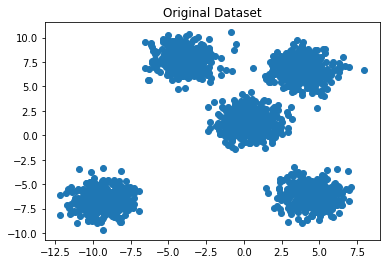

In [5]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset')
plt.show()

In [6]:
m=X.shape[0]
n=X.shape[1]
counter=0
n_iter=20
tolerance=0.001
flag=False
K=5

In [7]:
### RANDOM INIT ###
'''
centroids=np.array([]).reshape(n,0) 
for k in range(K):
    centroids=np.c_[centroids,X[random.randint(0,m-1)]]
'''

'\ncentroids=np.array([]).reshape(n,0) \nfor k in range(K):\n    centroids=np.c_[centroids,X[random.randint(0,m-1)]]\n'

In [8]:
### K-MEANS++ INIT ###
centroids = [X[random.randint(0,m-1)]]
for _ in range(1, K):    
        dist = np.array([min([np.sqrt(np.sum((c-x)**2)) for c in centroids]) for x in X])
        probs = dist/dist.sum()
        centroids.append(X[np.argmax(probs)])
centroids = np.array(centroids).T

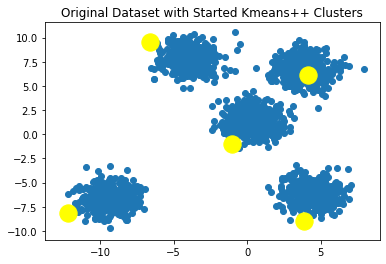

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset with Started Kmeans++ Clusters')
plt.scatter(centroids[0,:],centroids[1,:],s=300,c='yellow')
plt.show()

In [10]:
while (counter < n_iter):
    previous_centroids = list(centroids)
    previous_centroids = np.array(previous_centroids)
    counter += 1
    euclid_dists=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid_dists=np.c_[euclid_dists,dist]
    cmin=np.argmin(euclid_dists,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(n,0)
    for k in range(m):
        cent[cmin[k]]=np.c_[cent[cmin[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    print(counter,". iterasyon",)
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0) 
        diff = np.absolute(centroids[:,k] - previous_centroids[:,k])
        frobenius = np.linalg.norm(diff)
        print(k+1,".centroid frobenius degeri",frobenius)
        if frobenius < tolerance:
            flag = True
    print("***")
            
    final_cent=cent
    if flag==True:
        break

1 . iterasyon
1 .centroid frobenius degeri 0.6624425054730474
2 .centroid frobenius degeri 3.216850467679866
3 .centroid frobenius degeri 2.8810059979926663
4 .centroid frobenius degeri 3.1421536065292637
5 .centroid frobenius degeri 2.658948145997192
***
2 . iterasyon
1 .centroid frobenius degeri 0.24934862679893185
2 .centroid frobenius degeri 0.0
3 .centroid frobenius degeri 0.008012639470785725
4 .centroid frobenius degeri 0.03750138057169292
5 .centroid frobenius degeri 0.12656620085783066
***


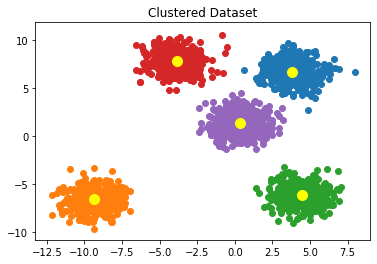

In [11]:
for k in range(K):
    plt.scatter(final_cent[k+1][:,0],final_cent[k+1][:,1])

plt.scatter(centroids[0,:],centroids[1,:],s=100,c='yellow')
plt.title('Clustered Dataset')
plt.show()

# *bonus algorithm to catch vertical clusters*

algorithm is my own opinion.

In [12]:
X

array([[  2.8937669 ,  -8.85149587],
       [ -5.58835937,   6.4315154 ],
       [  3.33793405,   6.88729252],
       ...,
       [  5.23424828,  -6.05669514],
       [  1.45799061,   2.31114805],
       [-10.26187825,  -6.45853505]])

In [13]:
PLUS = np.array([[-2.5, -6.8], [-2.7, -7.3], [-2.8, -7.5], [-2.8, -8], [-3, -9], [-3.1, -9.5]])
X = np.vstack((X,PLUS))
X

array([[ 2.8937669 , -8.85149587],
       [-5.58835937,  6.4315154 ],
       [ 3.33793405,  6.88729252],
       ...,
       [-2.8       , -8.        ],
       [-3.        , -9.        ],
       [-3.1       , -9.5       ]])

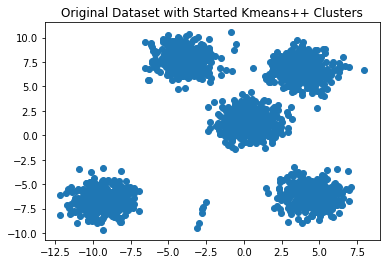

In [14]:
plt.scatter(X[:,0],X[:,1])
plt.title('Original Dataset with Started Kmeans++ Clusters')
plt.show()

In [15]:
#this time let's do the same for 6 clusters

In [16]:
m=X.shape[0]
n=X.shape[1]
counter=0
n_iter=20
tolerance=0.0001
flag=False
K=6

### K-MEANS++ INIT ###
centroids = [X[random.randint(0,m-1)]]
for _ in range(1, K):    
        dist = np.array([min([np.sqrt(np.sum((c-x)**2)) for c in centroids]) for x in X])
        probs = dist/dist.sum()
        centroids.append(X[np.argmax(probs)])
centroids = np.array(centroids).T

while (counter < n_iter):
    previous_centroids = list(centroids)
    previous_centroids = np.array(previous_centroids)
    counter += 1
    euclid_dists=np.array([]).reshape(m,0)
    for k in range(K):
        dist=np.sum((X-centroids[:,k])**2,axis=1)
        euclid_dists=np.c_[euclid_dists,dist]
    cmin=np.argmin(euclid_dists,axis=1)+1
    cent={}
    for k in range(K):
        cent[k+1]=np.array([]).reshape(n,0)
    for k in range(m):
        cent[cmin[k]]=np.c_[cent[cmin[k]],X[k]]
    for k in range(K):
        cent[k+1]=cent[k+1].T
    print(counter,". iterasyon",)
    for k in range(K):
        centroids[:,k]=np.mean(cent[k+1],axis=0) 
        diff = np.absolute(centroids[:,k] - previous_centroids[:,k])
        frobenius = np.linalg.norm(diff)
        print(k+1,".centroid frobenius degeri",frobenius)
        if frobenius < tolerance:
            flag = True
    print("***")
            
    final_cent=cent
    if flag==True:
        break

1 . iterasyon
1 .centroid frobenius degeri 0.3255114973387284
2 .centroid frobenius degeri 2.499645309912564
3 .centroid frobenius degeri 3.199238314105966
4 .centroid frobenius degeri 4.060752682730242
5 .centroid frobenius degeri 2.674911540063591
6 .centroid frobenius degeri 2.392261115295767
***
2 . iterasyon
1 .centroid frobenius degeri 0.21415141578522173
2 .centroid frobenius degeri 0.06596086432585728
3 .centroid frobenius degeri 0.016440369039812563
4 .centroid frobenius degeri 0.07925114725328407
5 .centroid frobenius degeri 0.1643725136350303
6 .centroid frobenius degeri 1.1985839714762911
***
3 . iterasyon
1 .centroid frobenius degeri 0.0
2 .centroid frobenius degeri 0.0
3 .centroid frobenius degeri 0.006633141481132812
4 .centroid frobenius degeri 0.0
5 .centroid frobenius degeri 0.0
6 .centroid frobenius degeri 0.596437717059519
***


In [17]:
values_list = []
for k in range(K):
    if(not any((final_cent[k+1][:,0] > 0))):
        x_fit=np.array(final_cent[k+1][:,0]).reshape(-1, 1)
        y_fit=final_cent[k+1][:,0]
        m, b = np.polyfit(final_cent[k+1][:,0], final_cent[k+1][:,1], 1)

        m = m - np.trunc(m)
        print(m)
        value = m / (np.absolute(final_cent[k+1][:,0].max()-final_cent[k+1][:,0].min()))**3
        if((value==np.inf) or (value==-np.inf)):
            values_list.append(999999)
        else:
            values_list.append(value)

    else:
        values_list.append(0)

-0.023100927730920873
0.0514767780890958
0.7226277372262713


In [18]:

values_list

[-0.00010294125389328039, 0, 0.00036024924701171174, 0, 0, 3.345498783454958]

In [19]:
inds_lane_clusters = []

for i in range(0,len(values_list)):
    if (values_list[i]==999999):
        inds_lane_clusters.append(i+1)
        values_list[i]=0

In [20]:
import statistics

def solution(items):
    average = statistics.mean(items)

    deviations = (abs(item - average) for item in items)
    maxima, index = max((val, idx) for idx, val in enumerate(deviations))

    return index

In [21]:
ind_detect = solution(values_list) +1
#max([3, 7, -10], key=abs)
#ind_detect = np.argmax(values_list)
nearest_anomaly_x_values = final_cent[ind_detect][:,0]
nearest_anomaly_y_values = final_cent[ind_detect][:,1]

m, b = np.polyfit(nearest_anomaly_x_values, nearest_anomaly_y_values, 1)

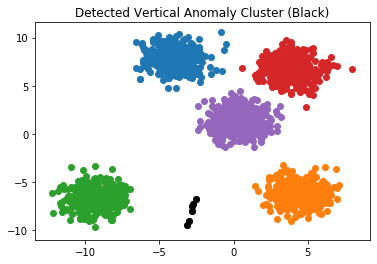

In [22]:
for k in range(K):
    plt.scatter(final_cent[k+1][:,0],final_cent[k+1][:,1])

#for c in inds_lane_clusters:
#    plt.scatter(final_cent[c][:,0],final_cent[c][:,1],c='black')
#If there is a perfectly vertical cluster that will plot it

plt.scatter(nearest_anomaly_x_values,nearest_anomaly_y_values,c='black')

plt.title('Detected Vertical Anomaly Cluster (Black)')
plt.show()

value = m / |x1-x2|^3 and find the cluster which has maximum value...
m: hidden slope of every clusters ,,,
|x1-x2|: cluster's width(x-axis) 


The formula is cubic(width) because I consider having a low width more important than a steep slope.


The formula has been coded to be calculated by filtering the situations that will break the calculation.
For example, if x1 = x2, value = inf, but it is assigned as 9999999 and filtered accordingly...